# Cambridge in Motion

## Example data exploration

Welcome! This notebook shows you how to explore a dataset using Python.

You will learn how to:
- load the data
- inspect what’s inside it
- calculate simple summaries
- draw a few useful plots
- start spotting patterns you could investigate further

You don’t need much Python to use this, most of the code is provided.

## How to use this notebook
1. Run each code cell from top to bottom.
2. Read the outputs and answer the short questions.
3. If you make changes, run the cell again to see what happens.
   
## Saving your work (important!)

This notebook is running on **Binder**, which gives you a temporary copy of this repository in your browser.

### What happens when you edit this notebook?
- Your changes are saved **only inside your Binder session**.
- Binder sessions are **temporary** — if you close the tab, refresh, or your session times out, your work may be lost.

### Can you overwrite or delete the GitHub repository?
No. You are working on **your own temporary copy** of the files.  
You **cannot** delete, overwrite, or change the original GitHub repository from Binder.

### How do I keep my work?
Before you finish, download your notebook to your computer:
- **File → Download → Notebook (.ipynb)**

If you export results (plots/tables), you can also copy them into your write-up or save figures using code.

## 1. Load the data

First we load the dataset from the `Data/` folder.

If this cell runs successfully, you’ll see:
- the number of rows and columns
- the first few rows of the dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the example data files
df1 = pd.read_csv("../Data/power_per_hour_20250724_20250730_sum.csv")
df2 = pd.read_csv("../Data/power_per_hour_20250731_20250806_sum.csv")

print("✅ Data loaded")
print("Rows, Columns:", df1.shape)

# Show the first 5 rows
df1.head()

✅ Data loaded
Rows, Columns: (168, 4)


,date,time,power_linear,power_db
0,2025-07-24,00:00,7.926009e+12,128.990546
1,2025-07-24,01:00,7.251484e+12,128.604269
2,2025-07-24,02:00,7.268839e+12,128.614651
3,2025-07-24,03:00,7.272245e+12,128.616685
4,2025-07-24,04:00,7.247563e+12,128.601920


## 2. What information is in the dataset?

Let’s look at:
- the column names
- the types of each column (numbers, text, dates…)
- how many missing values there are

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          168 non-null    object 
 1   time          168 non-null    object 
 2   power_linear  168 non-null    float64
 3   power_db      168 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.4+ KB


## 3. Quick summary statistics (`describe()`)

`describe()` gives quick stats for numeric columns, such as:
- count (how many values)
- mean (average)
- std (spread)
- min / max
- quartiles (25%, 50%, 75%)

These are often the fastest way to spot strange values or outliers.

In [57]:
df1.describe()

,power_linear,power_db
count,1.680000e+02,168.000000
mean,1.613168e+13,131.243388
std,1.093017e+13,2.587594
min,6.931169e+12,128.408065
25%,8.187471e+12,129.131496
50%,1.058929e+13,130.248663
75%,2.310790e+13,133.637113
max,5.015735e+13,137.003346


## 4. Visualising the data

Plots help you see patterns that are hard to spot in a table.

We’ll try:
- a histogram (distribution of values)
- a line plot (change over time)
- a scatter plot (relationship between two variables)

> Tip: if you’re not sure what to plot yet, start with one numeric column and see its distribution.

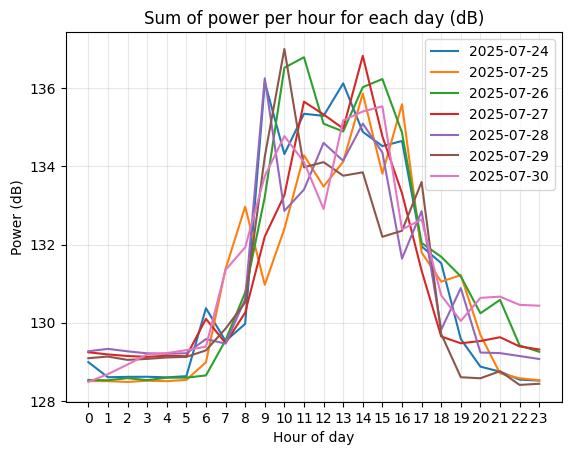

In [58]:
df1["hour"] = df1["time"].str.slice(0, 2).astype(int)  # Pull hour from the HH:MM time string.

for day in df1["date"].unique():  # Loop once per day.
    day_data = df1[df1["date"] == day]  # Only rows for this day.
    plt.plot(day_data["hour"], day_data["power_db"], label=day)  # Plot this day's line.

plt.xticks(range(24))  # Show hours 0 to 23 on the x axis.
plt.xlabel("Hour of day")  # Label the x axis.
plt.ylabel("Power (dB)")  # Label the y axis.
plt.title("Sum of power per hour for each day (dB)")  # Title of the plot.
plt.grid(alpha=0.3)  # Light grid for readability.
plt.legend()  # Show the legend with each day.
plt.show()  # Display the plot window.

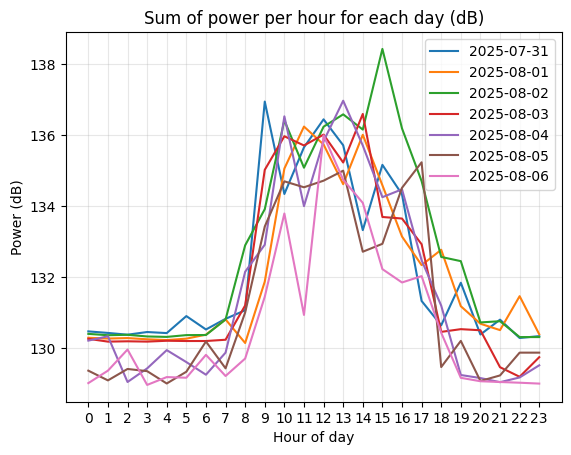

In [59]:
df2["hour"] = df2["time"].str.slice(0, 2).astype(int)  # Pull hour from the HH:MM time string.

for day in df2["date"].unique():  # Loop once per day.
    day_data = df2[df2["date"] == day]  # Only rows for this day.
    plt.plot(day_data["hour"], day_data["power_db"], label=day)  # Plot this day's line.

plt.xticks(range(24))  # Show hours 0 to 23 on the x axis.
plt.xlabel("Hour of day")  # Label the x axis.
plt.ylabel("Power (dB)")  # Label the y axis.
plt.title("Sum of power per hour for each day (dB)")  # Title of the plot.
plt.grid(alpha=0.3)  # Light grid for readability.
plt.legend()  # Show the legend with each day.
plt.show()  # Display the plot window.

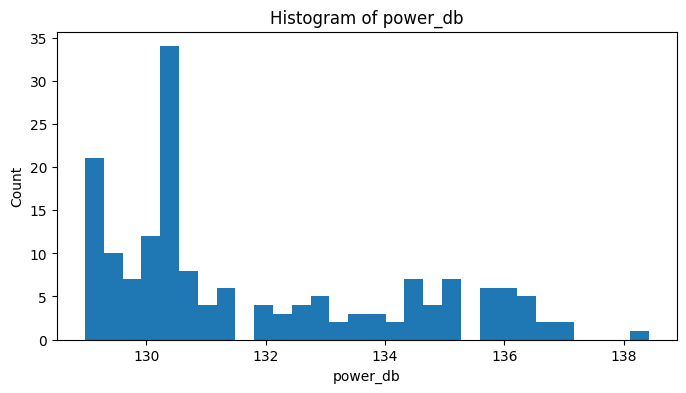

In [ ]:
col = df2.select_dtypes("number").columns[1]

plt.figure(figsize=(8, 4))
plt.hist(df2[col].dropna(), bins=30)
plt.title(f"Histogram of {col} for week 2")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

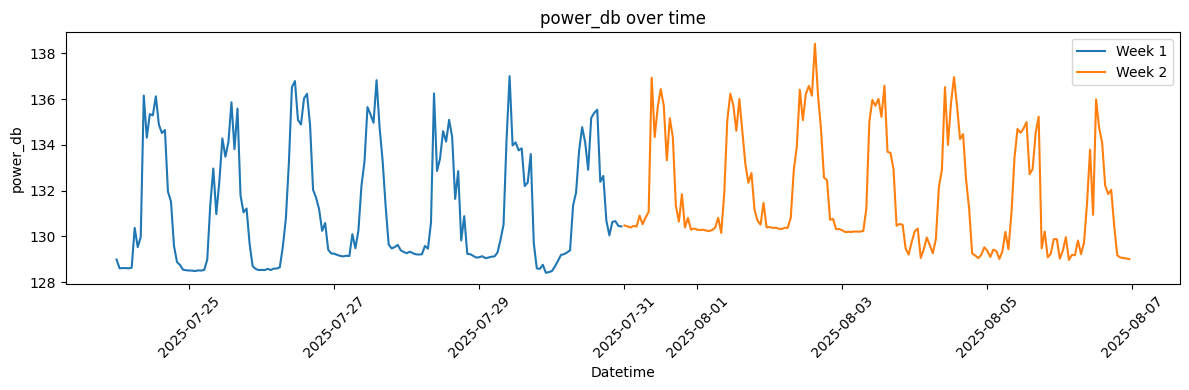

In [ ]:
# Power over time comparison plot

# Create datetime columns (date + time)
df1 = df1.copy()
df2 = df2.copy()
df1["datetime"] = pd.to_datetime(df1["date"] + " " + df1["time"])
df2["datetime"] = pd.to_datetime(df2["date"] + " " + df2["time"])

# Sort so the lines draw correctly
df1 = df1.sort_values("datetime")
df2 = df2.sort_values("datetime")

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df1["datetime"], df1["power_db"], label="Week 1")
plt.plot(df2["datetime"], df2["power_db"], label="Week 2")

plt.title("power_db over time")
plt.xlabel("Datetime")
plt.ylabel("power_db")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()